# Ridge Regression

Why Use Ridge Regression?
✅ Problem:

Linear and polynomial regression models can overfit if the model complexity increases.

Overfitting occurs when the model learns noise from the training data, leading to poor performance on unseen data.

✅ Solution:

Ridge Regression introduces a penalty term that shrinks the model coefficients, preventing overfitting.

It works best when all features contribute and none should be completely excluded.

✅ When to Use:

High-dimensional datasets with multicollinearity.

When you want to retain all features but control their impact.

Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Generate Sample Data



In [2]:
# Generate sample data with noise
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

Step 3: Split Data into Train and Test Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Step 4: Ridge Regression Implementation

In [5]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [6]:
y_ridge_pred = ridge_model.predict(X_test)

In [7]:
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R-squared (Ridge): {r2_ridge}")

Mean Squared Error (Ridge): 121.64571508040413
R-squared (Ridge): 0.994006040552328


# Lasso Regression

Why Use Lasso Regression?
✅ Problem:

When there are irrelevant features in the dataset, regular linear models may include them, leading to unnecessary complexity.

✅ Solution:

Lasso Regression (L1 regularization) can shrink some coefficients to zero, effectively eliminating irrelevant features.

It performs automatic feature selection.

✅ When to Use:

Sparse datasets where only a few features are relevant.

When you need an interpretable model with a subset of important features.

📈 Effect of Regularization
Ridge → Shrinks coefficients but never zeroes them.

Lasso → Shrinks some coefficients to zero, eliminating irrelevant features.


In [8]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [9]:
y_lasso_pred = lasso_model.predict(X_test)

In [10]:
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"R-squared (Lasso): {r2_lasso}")

Mean Squared Error (Lasso): 118.98573214003613
R-squared (Lasso): 0.9941371082998892


Step 6: Plot Coefficients to Visualize Regularization Effect

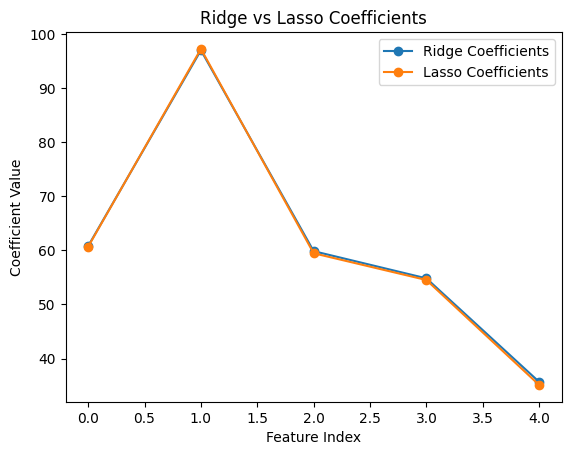

In [11]:
# Plot Ridge vs Lasso Coefficients
plt.plot(ridge_model.coef_, label="Ridge Coefficients", marker="o")
plt.plot(lasso_model.coef_, label="Lasso Coefficients", marker="o")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients")
plt.legend()
plt.show()

# Understanding Alpha in Ridge and Lasso Regression



What is Alpha (α)?
✅ Definition:

𝛼
α is the regularization strength or penalty parameter used in Ridge and Lasso regression.

It controls how much emphasis is placed on shrinking the model coefficients.

2️⃣ Effect of Alpha:
High Alpha (
𝛼) → Stronger penalty, more regularization.

* Shrinks coefficients more.

* Can lead to underfitting if too high.

Low Alpha (
𝛼) → Weaker penalty, less regularization.

* Coefficients remain closer to standard linear regression.

* Can lead to overfitting if too low.



Ridge Regression (L2 Penalty)
* The penalty term adds the squared magnitude of the coefficients to the cost function.

* Larger
𝛼 → Stronger penalty → Smaller coefficients.

Lasso Regression (L1 Penalty)
* The penalty term adds the absolute values of the coefficients.

* Larger
𝛼 → Some coefficients shrink to zero, effectively removing irrelevant features.


How to Choose Alpha?


✅ Grid Search/ Cross-Validation:

Use techniques like Grid Search or Cross-Validation to find the best alpha.

Optimal
𝛼 balances between underfitting and overfitting.

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), param_grid, cv = 5)
ridge_cv.fit(X_train, y_train)

print(f"Best Alpha (Ridge): {ridge_cv.best_params_['alpha']}")

Best Alpha (Ridge): 0.1


In [14]:
lasso_cv = GridSearchCV(Lasso(), param_grid, cv = 5)
lasso_cv.fit(X_train, y_train)

print(f"Best Alpha (Lasso): {lasso_cv.best_params_['alpha']}")

Best Alpha (Lasso): 0.01


# Impact of Alpha on Model Performance

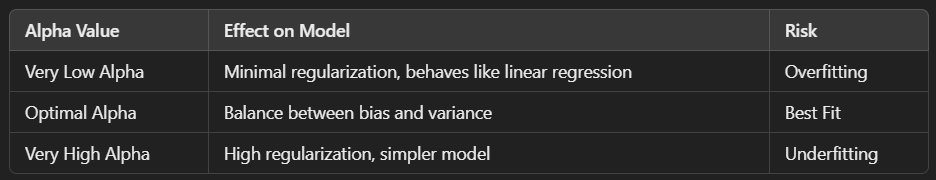

 Visualizing the Effect of Alpha

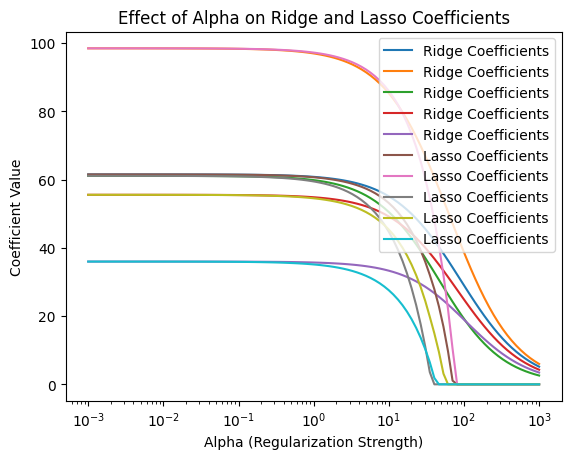

In [15]:
alphas = np.logspace(-3, 3, 100)
ridge_coefs, lasso_coefs = [], []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_coefs.append(ridge_model.coef_)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_coefs.append(lasso_model.coef_)

plt.plot(alphas, ridge_coefs, label="Ridge Coefficients")
plt.plot(alphas, lasso_coefs, label="Lasso Coefficients")
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Coefficient Value")
plt.title("Effect of Alpha on Ridge and Lasso Coefficients")
plt.legend()
plt.show()

# Key Takeaways:
* Alpha controls the regularization strength to prevent overfitting or underfitting.

* Low alpha → Minimal regularization → More overfitting.

* High alpha → Stronger regularization → Can lead to underfitting.

* Always tune alpha using Grid Search or Cross-Validation to find the best value.